In [39]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
pwd

'C:\\Users\\xpert'

In [41]:
df_train = pd.read_csv('C:\\Users\\xpert\\downloads\\train.csv')
df_test =pd.read_csv('C:\\Users\\xpert\\downloads\\test.csv')

In [42]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


DATA EXPLORATION AND FEATURES ENGINEERING


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#missing data in cabin,embarked and age columns we will deal with it later


In [45]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
#looking for categorical features

print(df_train['Pclass'].unique())

print(df_train['Pclass'].nunique()) #shows that most of the crew member were lower class 

[3 1 2]
3


In [47]:
# we can look at the other categorical features.
df_train.select_dtypes(include = 'object').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

mapping the categorical features of pclass and embarked columns
Embarked can be mapped according to data documentation (C = Cherbourg, Q = Queenstown, S = Southampton) for clearer readablity
pclass can be mapped as lower middle and upper class

In [48]:
df_train['Pclass'] = df_train['Pclass'].map({1:'Upper', 2:'Middle', 3:'Lower'})
df_test['Pclass'] = df_test['Pclass'].map({1:'Upper', 2:'Middle', 3:'Lower'})


In [49]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Lower,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,Upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,Lower,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,Upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,Lower,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df_train['Embarked'] = df_train['Embarked'].map({'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'})

df_test['Embarked'] = df_test['Embarked'].map({'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'})

In [51]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Lower,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,Upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,Lower,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,Upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,Lower,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


Let's look at Ticket next as a categorical features


In [52]:
df_train['Ticket'].head()
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

Ticket seems to be unstructured and doesn't hold any relevant information
Ticket should be removed during preprocessing

Dealing with missing data and outlier


In [53]:
df_train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [54]:
m = df_train.shape[0]

In [55]:
df_train_cabin_na = (df_train['Cabin'].isnull().sum() / m) * 100
print(f'percentage of nan in Cabin: {round(df_train_cabin_na, 1)}%')

percentage of nan in Cabin: 77.1%


#since there are 77% of the entries missing, we can't use this feature and will remove it in Pre Processing

#embarked and age should be cleared in preprocess


#Data visualization
LOOKING FOR RELATIONSHIP BETWEEN THE FEATURES AND SURVIVAL

Text(0.5, 1.0, 'survival vs deceased')

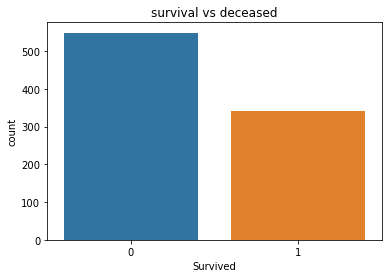

In [56]:
sns.countplot(x='Survived',data = df_train).set_title('survival vs deceased')

about 300 people survived

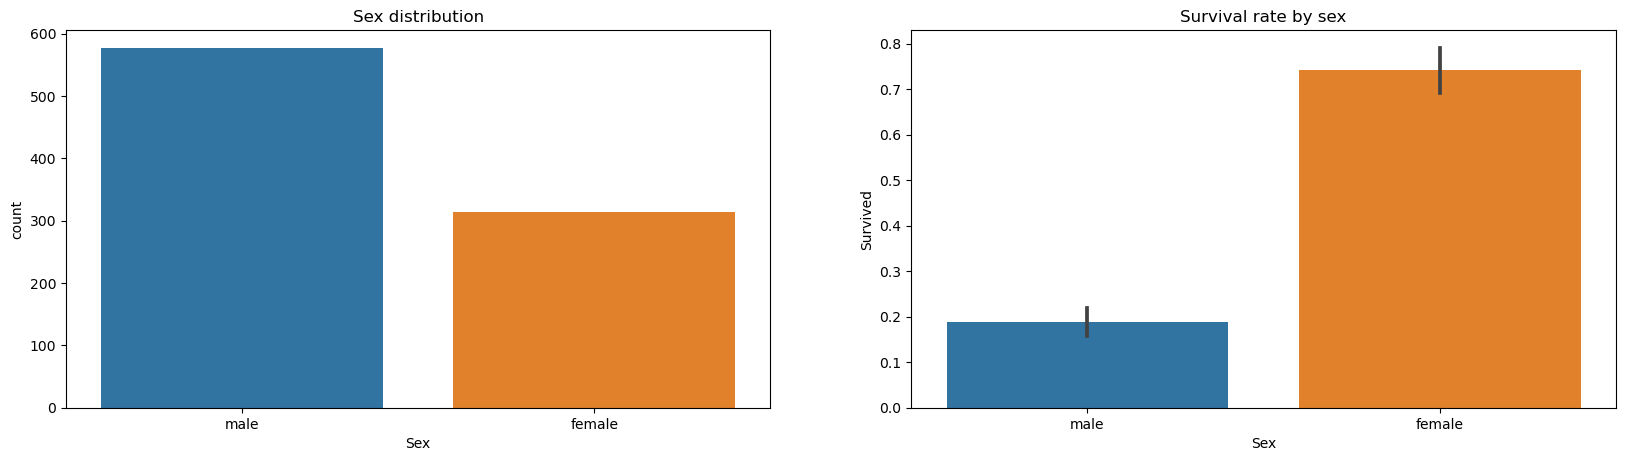

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), dpi=100)

sns.countplot(ax = axes[0], x = df_train['Sex']).set_title('Sex distribution')
sns.barplot(ax = axes[1], data = df_train, x = "Sex", y = "Survived").set_title('Survival rate by sex');


#THERE WERE MORE MALE ON THE SHIP
#THE SURVIVAL RATE OF FEMALE WAS VERY HIGH COMPARE TO MALE

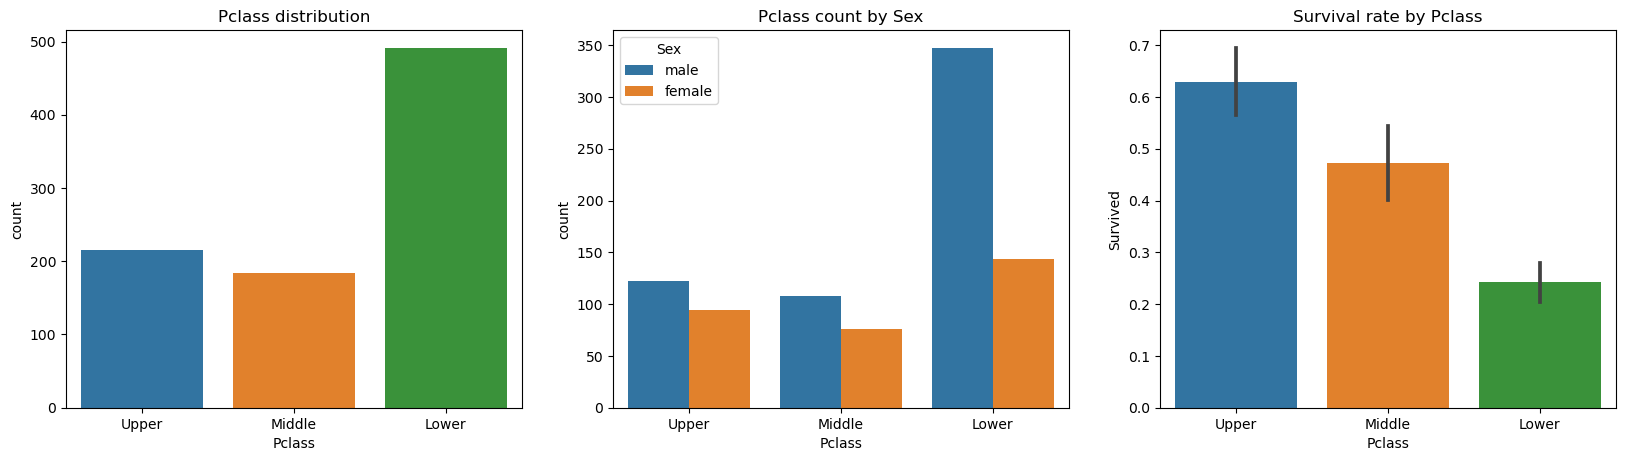

In [58]:
#Pclass
fig, axes = plt.subplots(1, 3, figsize=(20, 5),dpi=100)

pclass_order = ["Upper", "Middle", "Lower"]
sns.countplot(ax = axes[0], x = df_train['Pclass'], order = pclass_order).set_title('Pclass distribution')
sns.countplot(ax = axes[1], data = df_train, x = 'Pclass', order = pclass_order, hue = 'Sex').set_title('Pclass count by Sex')
sns.barplot(ax = axes[2], data = df_train, x = "Pclass", y = "Survived", order = pclass_order).set_title('Survival rate by Pclass');


This shows that there were more people in the lower class
there is a large number of male in the lower class and there was more male in all the classes
Chance of survival growths with class

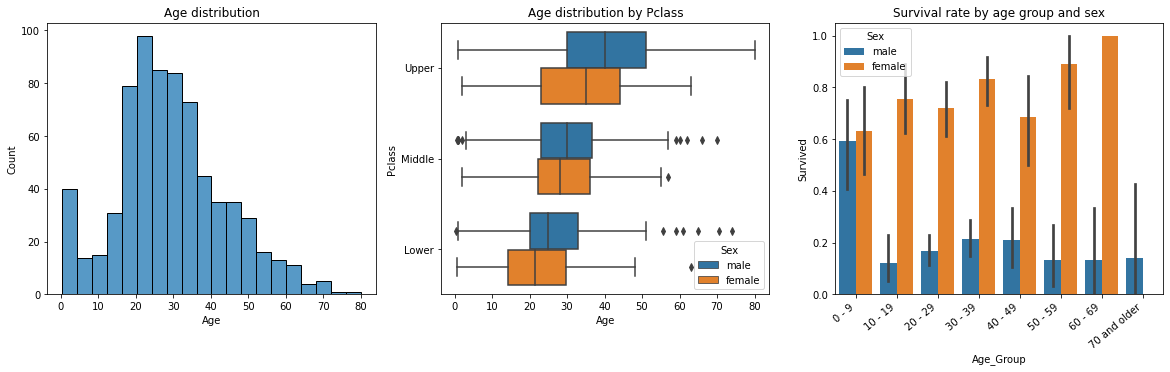

In [59]:
#age
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(ax = axes[0], data=df_train, x="Age").set_title('Age distribution')
sns.boxplot(ax = axes[1], data=df_train, x="Age", y="Pclass", hue='Sex', order=["Upper", "Middle", "Lower"]).set_title('Age distribution by Pclass')
#Plot by age group

#Define age limit for groups and their labels
age_groups_thresholds = [0, 9, 19, 29, 39, 49, 59, 69, np.inf]
age_groups = ["0 - 9", "10 - 19", "20 - 29", "30 - 39", "40 - 49", "50 - 59", "60 - 69", "70 and older"]

#Cut Age Series by thresholds and load into new feature
df_train["Age_Group"] = pd.cut(df_train['Age'], age_groups_thresholds, labels=age_groups)
sns.barplot(ax = axes[2], data=df_train, x="Age_Group", y="Survived", hue="Sex").set_title('Survival rate by age group and sex')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation = 40, ha="right");


The Age is normal distributed with a positive skew
The class tells us the general age group, with Lower having the youngest and Upper the oldest
For males, children from 0 - 9 had the highest chance of surival, women in all age groups had high survival rate


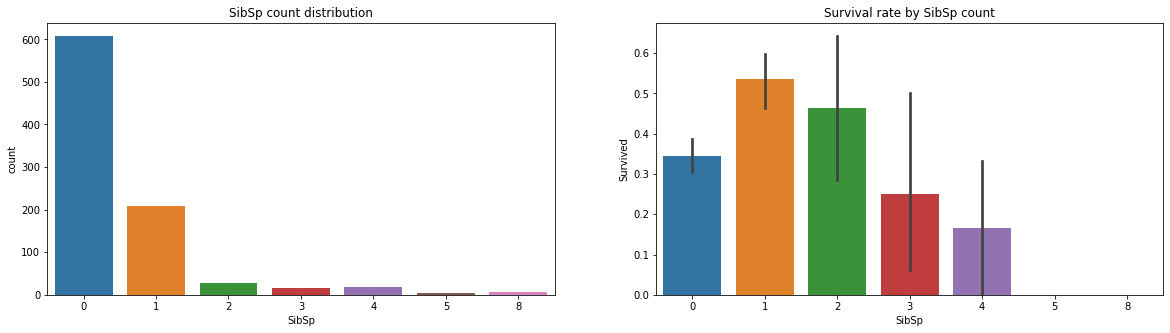

In [60]:
#SibSp
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(ax = axes[0], x = df_train['SibSp']).set_title('SibSp count distribution')
sns.barplot(ax = axes[1], data = df_train, x = "SibSp", y = "Survived").set_title('Survival rate by SibSp count');

The count of people gets lower with amount of siblings
Having 1 or 2 siblings on board was good for surivival, more made it worse

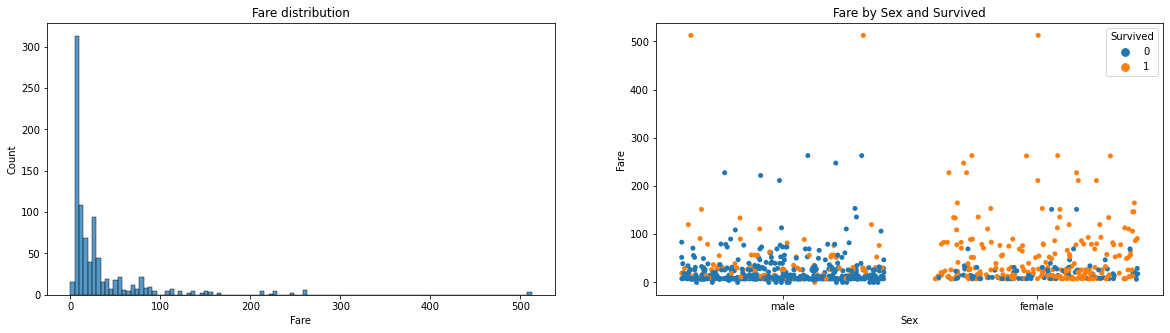

In [61]:
#Fare
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.histplot(ax = axes[0], x = df_train["Fare"]).set_title('Fare distribution')
sns.stripplot(ax = axes[1], data = df_train, x="Sex", y="Fare", hue="Survived", jitter=0.4).set_title('Fare by Sex and Survived');



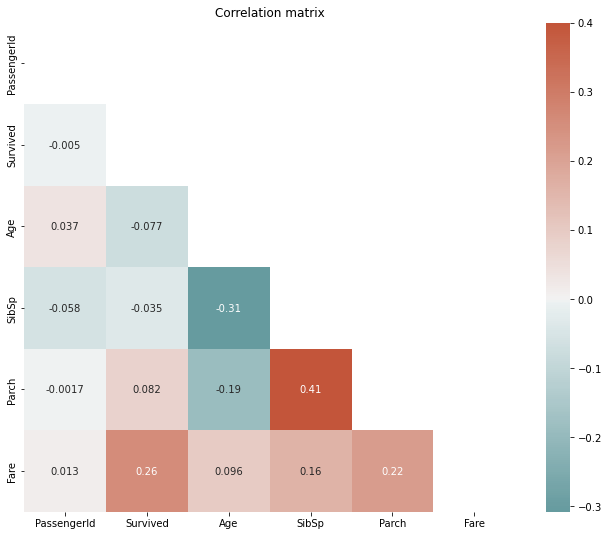

In [62]:
corr = df_train.corr()
plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(200, 20, as_cmap=True)
sns.heatmap(corr ,annot = True, mask=mask, cmap=cmap, vmax=.4, center=0).set_title('Correlation matrix');


Strongest correlation between Parch and SibSp, which comes from traveling families
The fare has the highest correlation to survived

after looking at the Pclass and Fare features, we could definitely see a trend. The correlation between Fare and Survival confirms it. Money first would have been a more accurate code of conduct. However, we did see that children had the highest survival rate of all ages.


# Pre Processing
FILLING MISSING DATA

In [63]:
age_mean = df_train['Age'].mean()

In [64]:
df_train['Age'].fillna(round(age_mean),inplace=True)
df_train['Embarked'].fillna(method = 'bfill', inplace = True)

#Test
age_mean_test = df_test['Age'].mean()
df_test['Age'].fillna(round(age_mean_test),inplace=True)
df_test['Embarked'].fillna(method = 'bfill', inplace = True)


#We fill up the missing Age values with the mean of all ages
#We fill up the missing Embarked values with backward fill, which will get the last avaiable value


In the next step, we will normalize the data to make it easier to work with. This will be important for the model predictions.
For numeric data, we standardize it by normalizing the min max to be inbetween 0 and 1. This makes the weight of all numeric features equal.

For categorical data, we use one hot encoding.

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from scipy.spatial import distance


In [66]:
#Scale all numeric features to 0 - 1

def scale(num_features):
    min_max_scaler = MinMaxScaler()
    num_features = min_max_scaler.fit_transform(num_features)
    return pd.DataFrame(num_features)

#One hot encode categorical features
def one_hot_encode(cat_features):
    one_hot_enc = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
    cat_features_one_hot = pd.DataFrame(one_hot_enc.fit_transform(cat_features))
    return pd.DataFrame(cat_features_one_hot)

#Normalize data according to data type
def normalize_data(df):
    cat_features = df.select_dtypes(include = 'object')
    num_features = df.select_dtypes(exclude = 'object')
    
    cat_features = one_hot_encode(cat_features)
    num_features = scale(num_features)

    df = pd.concat([num_features, cat_features], axis = 1)
    return df.to_numpy()

In [69]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,Lower,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Queenstown
1,893,Lower,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,Southampton
2,894,Middle,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Queenstown
3,895,Lower,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,Southampton
4,896,Lower,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,Southampton


#MODEL BUILDING

In [70]:
#TRAIN
X= df_train[['Age', 'Fare', 'SibSp', 'Parch', 'Sex', 'Pclass', 'Embarked']]
X = normalize_data(X)
y=df_train['Survived'].to_numpy()

In [71]:
X_train, X_dev, y_train, y_dev = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=0)


In [72]:
#Test
X_test = df_test[['Age', 'Fare', 'SibSp', 'Parch', 'Sex', 'Pclass', 'Embarked']]
X_test = normalize_data(X_test)

choose the train features X which we discussed in the Data Exploration
used Survived as goal variable y
split the data in train and dev for cross validation

In [73]:
#k-Nearest-Neighbours (kNN) uses the spacial distance between points in the data set. For every entry in x_test, we check its nearest 
# we are going to use KNearestNeighbourEstimatorVect

In [74]:
class KNearestNeighbourEstimatorVect():
    def __init__(self, k_):
        self.k_ = k_
    
    def fit(self, X, y):
        self.X_ = X
        self.y_ = y

    def predict(self, X):
        distances = distance.cdist(X, self.X_, 'euclidean')
        i_k_smallest = np.argpartition(distances, self.k_)[:,:self.k_]
        values = self.y_[i_k_smallest]
        predictions = np.average(values, axis=1) > 0.5
        return 1*predictions
        
        

In [75]:
m = len(y_train)

best_accuracy =  float('-inf')
best_k = -1
for k in range(1, m):
    knn_estimator = KNearestNeighbourEstimatorVect(k_ = k)
    knn_estimator.fit(X_train, y_train)
    y_pred = knn_estimator.predict(X_dev)
    accuracy = accuracy_score(y_dev, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_y_pred = y_pred
        
print(f'Best k: {best_k}')
print(f'Score:  {round(best_accuracy, 2)}')


Best k: 76
Score:  0.83


We get a score of 0.83!

In [76]:
confusion_m = confusion_matrix(y_dev, best_y_pred)

In [77]:
confusion_m

array([[108,   2],
       [ 28,  41]], dtype=int64)

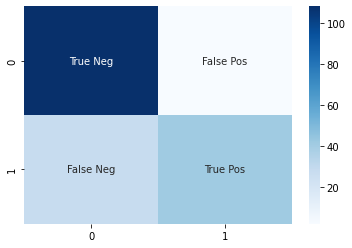

In [78]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_m, annot = labels, fmt = '', cmap = 'Blues');

In the confusion matrix, we see that most errors stem from False Negatives. As we saw in the visualization, the Survived values are not equally distributed. This explains the unqual error rate.


In [80]:
#Submission
knn_estimator = KNearestNeighbourEstimatorVect(k_ = best_k)
knn_estimator.fit(X_train, y_train)
y_pred = knn_estimator.predict(X_test)


In [81]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [82]:
# output file
output = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred})
output.to_csv('submission.csv', index = False)
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
